In [2]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats

### Monotone Functions ###
Let $X$ have density $f_X$. Let $g$ be a smooth (that is, differentiable) increasing function, and let $Y = g(X)$. Examples of such functions $g$ are:
- $g(x) = ax + b$ for some $a > 0$. This case was covered in the previous section.
- $g(x) = e^x$
- $g(x) = \sqrt{x}$ on positive values of $x$

To find a formula for the density of $Y$ in terms of $f_X$ and $g$, we will use the same approach as in the previous section.

- For $Y$ to be $y$, $X$ has to be $g^{-1}(y)$.
- Now $g$ need not be linear, so the tranformation by $g$ won't necessarily stretch the horizontal axis by a constant factor. Instead, the factor has different values at each $x$. If $g'$ denotes the derivative of $g$, then the stretch factor at $x$ is $g'(x)$, the rate of change of $g$ at $x$. To make the total area under the density equal to 1, we have to compensate by dividing by $g'(x)$. This is valid because $g$ is increasing and hence $g'$ is positive.

Thus we have an intuitive justification for the following formula.

### Change of Variable Formula for Density: Increasing Function ###
The density of $Y = g(X)$ is given by
$$
f_Y(y) ~ = ~ f_X(x) \cdot \frac{1}{g'(x)} ~~~ \text{at } x = g^{-1}(y)
$$

Before we formally establish the formula, let's use it in an example so that we understand all its component parts.

### Log-normal Density ###
Let $Z$ be a standard normal random variable and suppose $\mu$ and $\sigma$ are constants with $\sigma > 0$. Let $Y = e^{\sigma Z + \mu}$. Then $Y$ is a random variable *whose $\log$ is normal* and hence its density is known as *log-normal*.

To find the density of $Y$, first note that the possible values of $Y$ are in $(0, \infty)$. Here are the components of the change of variable formula.

- Define $g(z) = e^{\sigma z + \mu}$. Then $g$ is increasing because $\sigma > 0$.
- The derivative of $g$ is given by $g'(z) = \sigma e^{\sigma z + \mu}$.
- For $y > 0$ let $y = g(z) = e^{\sigma z + \mu}$. Then $z = g^{-1}(y) = \frac{\log(y) - \mu}{\sigma}$.
- The density of $Z$ is $\phi(z) = \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}z^2}$.

For $y > 0$ our formula says
$$
f_Y(y) ~ = ~ \phi(z) \frac{1}{g'(z)} ~~~ \text{at } z = g^{-1}(y)
$$
So

$$
f_Y(y) ~ = ~ \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}z^2} \frac{1}{\sigma e^{\sigma z + \mu}}
~~~ \text{at } z = g^{-1}(y) 
$$

At $z = g^{-1}(y) = \frac{\log(y) - \mu}{\sigma}$ we have $\sigma z + \mu = \log(y)$ and hence $e^{\sigma z + \mu} = y$.

Hence for $y > 0$,
$$
f_Y(y) ~ = ~ \frac{1}{\sqrt{2\pi}\sigma y} e^{-\frac{1}{2} \big{(} \frac{\log(y) - \mu}{\sigma} \big{)}^2}
$$

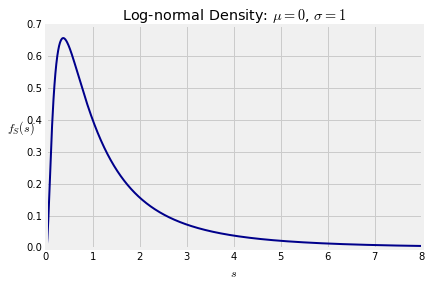

In [14]:
# HIDDEN
x = np.arange(0, 8.01, 0.01)
y = stats.lognorm.pdf(x, s=1, loc=0, scale=np.exp(0))
plt.plot(x, y, color='darkblue', lw=2)
plt.xlabel('$s$')
plt.ylabel('$f_S(s)$', rotation=0)
plt.title('Log-normal Density: $\mu = 0$, $\sigma = 1$');

A log-normal density can be used as an approximation for the density of a product of a large number of i.i.d. random variables. The log of the product is the sum of a large number of i.i.d. variables, and hence is approximately normal by the Central Limit Theorem.

### Proof of Formula ###
Let $g$ be smooth and increasing, and let $Y = g(X)$. We want a formula for $f_Y$. We can derive it by using the cdf as we did for linear functions.

\begin{align*}
F_Y(y) ~ & = ~ P(Y \le y) \\
&= ~ P(g(X) \le y) \\
&= ~ P(X \le g^{-1}(y)) ~~~~ g \text{ is increasing} \\
&= ~ F_X(g^{-1}(y))
\end{align*}

By the chain rule and the fact that the derivative of an inverse is the reciprocal of the derivative,
$$
f_Y(y) ~ = ~ f_X(g^{-1}(y)) \frac{d}{dy} g^{-1}(y)
~ = ~ f_X(x) \frac{1}{g'(x)} ~ \text{at } x = g^{-1}(y)
$$

### Change of Variable Formula for Density: Monotone Function ###
Let $g$ be smooth and monotone (that is, either increasing or decreasing). The density of $Y = g(X)$ is given by

$$
f_Y(y) ~ = ~ f_X(x) \cdot \frac{1}{\lvert g'(x) \rvert} ~~~ \text{at } x = g^{-1}(y)
$$

We have proved the result for increasing $g$. When $g$ is decreasing, the proof is analogous to proof in the linear case and accounts for $g'$ being negative. We won't take the time to write it out.

### Reciprocal of a Uniform Variable ###
Let $U$ be uniform on $(0, 1)$ and let $V = 1/U$. The distribution of $V$ is called the *inverse uniform* but the word "inverse" is confusing in the context of change of variable. So we will simply call $V$ the reciprocal of $U$.

To find the density of $V$, start by noticing that the possible values of $V$ are in $(1, \infty)$ as the possible values of $U$ are in $(0, 1)$.

The components of the change of variable formula for densities:
- Define $g(u) = 1/u$.
- Then $g'(u) = -u^{-2}$.
- Let $v = g(u) = 1/u$. Then $u = g^{-1}(v) = 1/v$.
- $f_U(u) = 1$ for $0 < u < 1$.

By the formula, for $v > 1$ we have
$$
f_V(v) ~ = ~ f_U(u) \cdot \frac{1}{\lvert g'(u) \rvert} ~~~ \text{at } u = g^{-1}(v)
$$

That is, for $v > 1$,
$$
f_V(v) ~ = ~ 1 \cdot u^2 ~~~ \text{at } u = 1/v
$$
So 
$$
f_V(v) ~ = ~ \frac{1}{v^2}, ~~~ v > 1
$$

You should check that $f_V$ is indeed a density, that is, it integrates to 1. You should also check that the expectation of $V$ is infinite.

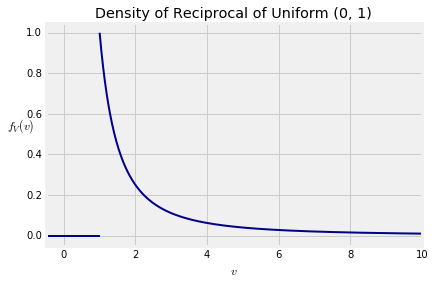

In [19]:
# HIDDEN
v = np.arange(1, 10, 0.01)
y = 1/v**2
plt.plot(v, y, color='darkblue', lw=2)
plt.plot([-0.5, 1], [0, 0], color='darkblue', lw=2 )
plt.ylim(-0.05, 1.05)
plt.xlim(-0.5, 10)
plt.xlabel('$v$')
plt.ylabel('$f_V(v)$', rotation=0)
plt.title('Density of Reciprocal of Uniform (0, 1)');